# Pythonサンプルプログラム

In [1]:
import pandas as pd
import numpy as np

def run_class_assignment():
    np.random.seed(0)  # 再現性のための乱数シード
    num_students = 50

    # データ作成
    data = {
        'ID': list(range(1, num_students + 1)),
        'japanese': np.random.randint(1, 6, num_students),
        'music': np.random.randint(1, 6, num_students),
        'exercise': np.random.randint(1, 6, num_students),
        'class': [''] * num_students,  # クラス分けの結果を入れるための列
        'group': [''] * num_students  # 成績に基づいて設定したグループ
    }
    df = pd.DataFrame(data)

    # leaders、arts、phisicalsグループの選出
    leaders = df.nlargest(6, ['japanese', 'music', 'exercise']).sort_values(by=['japanese', 'music', 'exercise'], ascending=False)
    arts = df[~df['ID'].isin(leaders['ID'])].nlargest(3, 'music')
    phisicals = df[~df['ID'].isin(leaders['ID']) & ~df['ID'].isin(arts['ID'])].nlargest(9, 'exercise')
    others = df[~df['ID'].isin(leaders['ID']) & ~df['ID'].isin(arts['ID']) & ~df['ID'].isin(phisicals['ID'])]

    # グループ情報の設定
    df.loc[leaders.index, 'group'] = 'leaders'
    df.loc[arts.index, 'group'] = 'arts'
    df.loc[phisicals.index, 'group'] = 'phisicals'

    # クラス分けの準備
    classes = {
        'Class1': [],
        'Class2': [],
        'Class3': []
    }

    # leaders、arts、phisicalsのそれぞれから最低1人クラスにアサイン
    for group, num_students in zip([leaders, arts, phisicals], [3, 1, 1]):
        for i in range(num_students):
            classes[f'Class{i+1}'].append(group.iloc[i])

    # leaders、arts、phisicalsのメンバーがどこかのクラスにアサインされるようにする
    for group in [leaders, arts, phisicals]:
        for index, row in group.iterrows():
            if row['ID'] not in [student['ID'] for students in classes.values() for student in students]:
                min_class = min(classes, key=lambda x: len(classes[x]))
                classes[min_class].append(row)

    # その他の生徒をクラスにアサイン
    for index, row in others.iterrows():
        min_class_size = min(len(classes['Class1']), len(classes['Class2']), len(classes['Class3']))
        if min_class_size < 16:
            min_class = min(classes, key=lambda x: len(classes[x]))
            classes[min_class].append(row)

    # 各クラスが最低16人以上で、合計が50人になるようにする
    while sum(len(students) for students in classes.values()) < 50:
        min_class = min(classes, key=lambda x: len(classes[x]))
        if len(others) > 0:
            classes[min_class].append(others.iloc[0])
            others = others.drop(index=others.index[0])  # 追加した生徒を削除

    # 各クラスのサイズを確認して調整する
    for class_name, students in classes.items():
        while len(students) < 16:
            if len(others) > 0:
                classes[class_name].append(others.iloc[0])
                others = others.drop(index=others.index[0])  # 追加した生徒を削除

    # クラス分けの結果をデータフレームに追加
    for class_name, students in classes.items():
        for student in students:
            df.loc[df['ID'] == student['ID'], 'class'] = class_name

    return df[['ID', 'japanese', 'music', 'exercise', 'class', 'group']]

# # テスト実行
# result = run_class_assignment()
# print(result)


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_plotting(data):
    def plot_box_chart(ax, df, subject):
        ax.boxplot([
            df[df['class'] == 'Class1'][subject],
            df[df['class'] == 'Class2'][subject],
            df[df['class'] == 'Class3'][subject]
        ], labels=['Class1', 'Class2', 'Class3'])
        ax.scatter(np.arange(1, 4), [df[df['class'] == f'Class{i}'][subject].mean() for i in range(1, 4)], color='red', label='Class Mean')
        ax.set_title(f'Box Plot - {subject} Scores')
        ax.set_xlabel('Class')
        ax.set_ylabel(f'{subject.capitalize()} Scores')
        ax.grid(True)

    # DataFrameを作成
    df = pd.DataFrame(data)

    # プロットの配置を作成
    fig, axs = plt.subplots(2, 2, figsize=(16, 9))

    # 各種プロットを描画
    plot_box_chart(axs[0, 0], df, 'japanese')
    plot_box_chart(axs[0, 1], df, 'music')
    plot_box_chart(axs[1, 0], df, 'exercise')

    # レイアウトを調整して表示
    plt.tight_layout()
    plt.show()

# # テストデータを用意して実行
# data = {
#     'ID': np.arange(1, 21),
#     'japanese': np.random.randint(50, 100, 20),
#     'music': np.random.randint(40, 95, 20),
#     'exercise': np.random.randint(30, 80, 20),
#     'class': np.random.choice(['Class1', 'Class2', 'Class3'], 20),
#     'group': np.random.choice(['A', 'B', 'C'], 20)
# }

# run_plotting(data)


In [107]:
def main():

    # 成績によるクラス分け
    result = run_class_assignment()
    
    #     # Matplotを使った図形描画
    run_plotting(data=result)


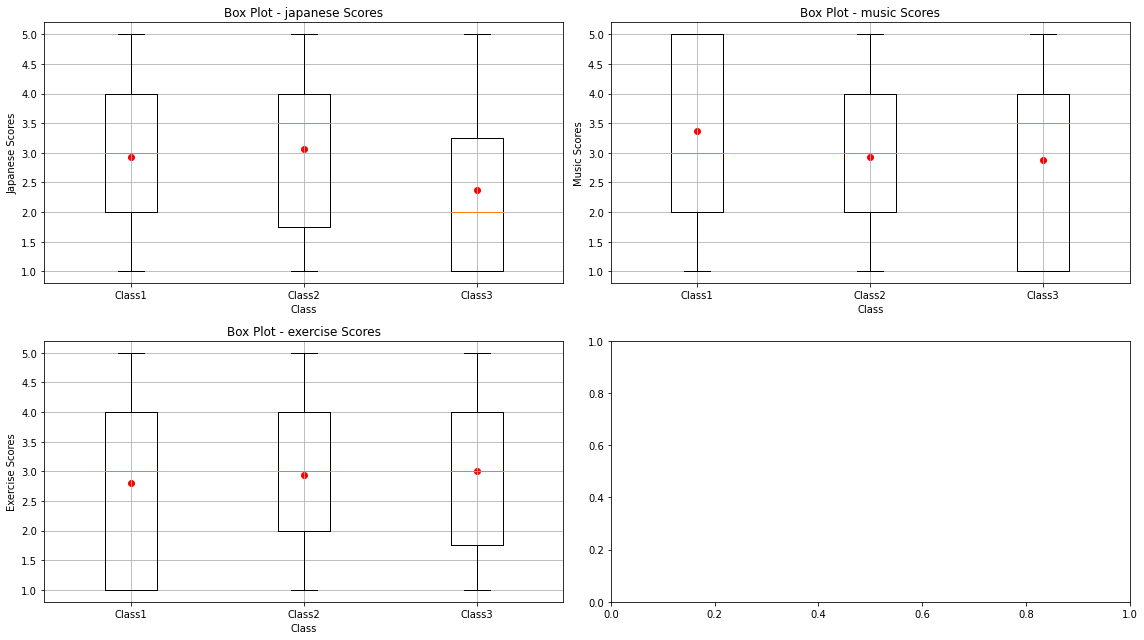

In [108]:
if __name__ == "__main__":
    main()